<h1> Project 2: Investigating the Data set </h1>
<br>
<h2>Introduction</h2>
<br>
For this final project, choosing the data set is the first step, for this project i am choosing the data set which is 
<b><font color='red'> tmbd.csv</font></b>
<br>
<h2>Data Overview</h2>

This Data contains a total of 10866 reviews, with movies of 5067 directors

<h2> Questions</h2>
- Movie with most earning?<br>
- Movie with lowest earning?<br>
- Average Run time?<br>
- Longest Run time movie?<br>
- Shortest Run time movie?<br>
- Highest rated most earning movie?<br>
- Actors with most movies?<br>
- Actors with least movies?<br>
- Most and Least popular Genre?<br>
- Highest Budget Movie earning least?<br>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import pprint
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('tmdb-movies.csv')

In [10]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


<h1>Data Wrangling</h1>
In this step we are going to wrangle the data and only keep those which are important for the above questions asked.

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [15]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Deleting those coloumns which are not necessary for the above questions asked. 

In [21]:
#Selecting coloums to be deleted
dele=['imdb_id', 'homepage','tagline','keywords','production_companies']
df=df.drop(dele,axis=1)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [23]:
df.drop_duplicates(inplace=True)

In [27]:
df


,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


Here i notice that most of the budget and revenue section has 0 as a value, which is not possible so we are going to drop this values, but before that lets convert 0's to Nan so that we can use the dropna function

In [28]:
ok=['budget', 'revenue']
df[ok] = df[ok].replace(0, np.NAN)
df.dropna(subset = ok, inplace = True)

In [29]:
df.shape

(3854, 16)

In [30]:
(10866-3854)/10866*100

64.53156635376403

Here we can see, that we have lost 64.5% of our Data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   popularity      3854 non-null   float64
 2   budget          3854 non-null   float64
 3   revenue         3854 non-null   float64
 4   original_title  3854 non-null   object 
 5   cast            3850 non-null   object 
 6   director        3853 non-null   object 
 7   overview        3854 non-null   object 
 8   runtime         3854 non-null   int64  
 9   genres          3854 non-null   object 
 10  release_date    3854 non-null   object 
 11  vote_count      3854 non-null   int64  
 12  vote_average    3854 non-null   float64
 13  release_year    3854 non-null   int64  
 14  budget_adj      3854 non-null   float64
 15  revenue_adj     3854 non-null   float64
dtypes: float64(6), int64(4), object(6)
memory usage: 511.9+ KB


Here we can see that our release date is a string, so we need to convert it into a Data time object so that we can do our further analysis.

In [32]:
df.release_date=pd.to_datetime(df['release_date'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   float64       
 3   revenue         3854 non-null   float64       
 4   original_title  3854 non-null   object        
 5   cast            3850 non-null   object        
 6   director        3853 non-null   object        
 7   overview        3854 non-null   object        
 8   runtime         3854 non-null   int64         
 9   genres          3854 non-null   object        
 10  release_date    3854 non-null   datetime64[ns]
 11  vote_count      3854 non-null   int64         
 12  vote_average    3854 non-null   float64       
 13  release_year    3854 non-null   int64         
 14  budget_adj      3854 non-null   float64       
 15  rev

<h1>EDA</h1>

1. Movie with most earnings?

In [46]:
earning =df['revenue'].max()

In [47]:
df[df['revenue']==earning].original_title

1386    Avatar
Name: original_title, dtype: object

2. Movie with least earnings?

In [48]:
earning =df['revenue'].min()
df[df['revenue']==earning].original_title

5067    Shattered Glass
8142           Mallrats
Name: original_title, dtype: object

3. Average Run time?

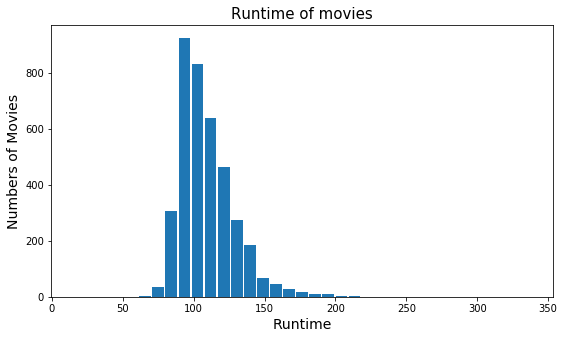

In [53]:
plt.figure(figsize=(9,5))
plt.xlabel('Runtime', fontsize = 14) 
plt.ylabel('Numbers of Movies', fontsize=14)
plt.title('Runtime of movies', fontsize=15)
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
plt.show()

In [52]:
def AvgRun(column):
    return df[column].mean()
AvgRun('runtime')

109.22029060716139

4. Longest run time Movie? 

In [58]:
def calculate(column):
    #for highest earned profit
    long= df[column].idxmax()
    longdetails=pd.DataFrame(df.loc[long])
    return longdetails

In [60]:
calculate('runtime')

,2107
id,43434
popularity,0.534192
budget,1.8e+07
revenue,871279
original_title,Carlos
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director,Olivier Assayas
overview,"The story of Venezuelan revolutionary, Ilich R..."
runtime,338
genres,Crime|Drama|Thriller|History


5. Smallest Run time?

In [62]:
def calculates(column):
    #for highest earned profit
    small= df[column].idxmin()
    smalldetails=pd.DataFrame(df.loc[small])
    return smalldetails

In [63]:
calculates('runtime')

,5162
id,24914
popularity,0.208637
budget,10
revenue,5
original_title,Kid's Story
cast,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Shinichiro Watanabe
overview,A high school student is haunted by thoughts o...
runtime,15
genres,Science Fiction|Animation


6. Highest rated most earning movie?

In [76]:
ok=df.sort_values(['vote_average', 'revenue'], ascending=[False, False])

In [80]:
ok.iloc[0]

id                                                              278
popularity                                                  7.19204
budget                                                      2.5e+07
revenue                                                 2.83415e+07
original_title                             The Shawshank Redemption
cast              Tim Robbins|Morgan Freeman|Bob Gunton|William ...
director                                             Frank Darabont
overview          Framed in the 1940s for the double murder of h...
runtime                                                         142
genres                                                  Drama|Crime
release_date                                    1994-09-10 00:00:00
vote_count                                                     5754
vote_average                                                    8.4
release_year                                                   1994
budget_adj                                      

7. Actors with Most Movies?

In [81]:
data = df['cast'].str.cat(sep = '|')

In [83]:
data = pd.Series(data.split('|'))

In [95]:
data.value_counts()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
                     ..
John Furey            1
Bronson Pinchot       1
Jeff Fahey            1
Pink                  1
Kathryn Harrold       1
Length: 6839, dtype: int64

8. Actors with least movies?

In [97]:
data.value_counts(sort=False)

Kathryn Harrold       1
Phil Hartman          2
MyAnna Buring         1
ZoÃ« Bell             2
Norma Crane           1
                     ..
Matt Lauer            1
Zoe Saldana          15
Maxwell Caulfield     1
Anna Wing             1
Don Gordon            2
Length: 6839, dtype: int64

9. Most popular genres?

In [100]:
data = df['genres'].str.cat(sep = '|')

In [101]:
data = pd.Series(data.split('|'))

In [103]:
count=data.value_counts()

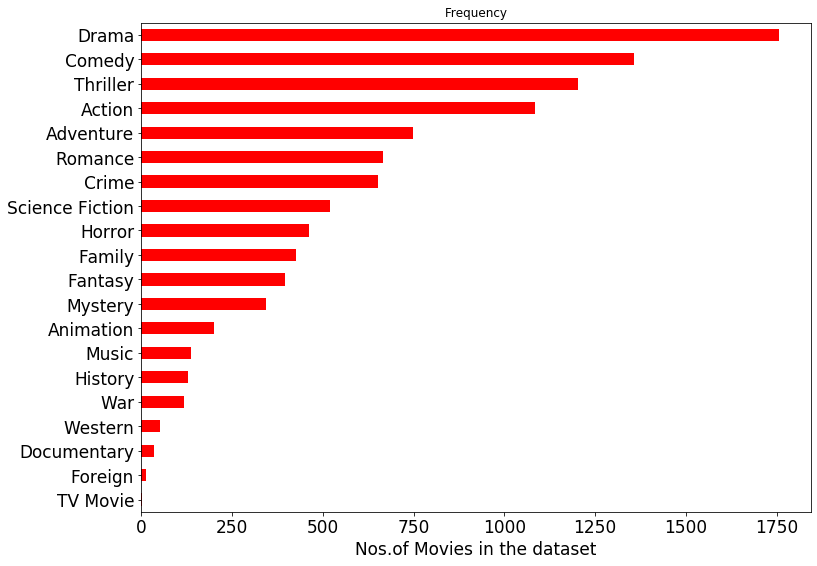

In [107]:
count.sort_values(ascending = True, inplace = True)
lt = count.plot.barh(color = 'red', fontsize = 17)
lt.set(title = 'Frequency')
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '17')
lt.figure.set_size_inches(12, 9)
plt.show()

10. Highest Budget Movie earning least?

In [113]:
ok=df.sort_values(['budget', 'revenue'], ascending=[False, True])

In [116]:
ok.iloc[0]

id                                                            46528
popularity                                                  0.25054
budget                                                     4.25e+08
revenue                                                 1.10876e+07
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
overview          An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
budget_adj                                      

<h1>Conclusions</h1>
From this analysis i found out various conclusions which are as follows.<br>
- Avatar is the movie with most earning.<br>
- Shattered Glass in the movie with least earnings.<br>
- Average Run time of all movies are about 109.22<br>
- Longest run time is of Carlos which is 338 Minutes<br>
- Smallest run time is of Kid's Story which is 15 Minutes.<br>
- The highest Rated most earning movie is The Shawshank Redemption<br>
- Actor with most movies is Robert Di Nero<br>
- Kathryn Harrold  is the Actor with least Movies, altough there are more with same amount of movies as her.<br>
- Most popular Genre would be Drama.<br>
- The warrior's way is the most costly less earning movie.<br>